In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [24]:
using Distributions, Random, CairoMakie, Statistics

In [34]:
d = Normal(0,2)

Normal{Float64}(μ=0.0, σ=2.0)

In [4]:
N = 1000
steps = rand(d, N-1)

999-element Vector{Float64}:
 -0.7961087276312594
  0.24164519934641235
 -0.7815409850362568
  0.038176052534912804
 -1.270341607654406
  1.2162523337181275
  0.47227383507302145
  0.329978698647687
  0.1705582411355143
  1.8286417979156162
  0.9629337865042376
 -0.24902588440965626
  1.1459078549509523
  ⋮
 -0.3612714313629008
  1.0089269839037447
 -0.04879470755141013
 -0.7712515188779507
  0.5981100024340679
 -0.6343147193726496
  0.8383452884266148
  1.9570127183229644
 -0.12874446653599803
 -0.5219708702514813
  0.48673803166735347
 -1.5757402067153907

In [42]:
mean(steps)

0.10958940571542754

In [41]:
sqrt(mean(steps .^2 ))

2.0216923783784755

In [8]:
x = pushfirst!(cumsum(steps),0)

1000-element Vector{Float64}:
   0.0
  -0.7961087276312594
  -0.554463528284847
  -1.3360045133211038
  -1.297828460786191
  -2.568170068440597
  -1.3519177347224693
  -0.879643899649448
  -0.5496652010017611
  -0.37910695986624676
   1.4495348380493693
   2.4124686245536067
   2.1634427401439504
   ⋮
 -15.687345270152385
 -14.67841828624864
 -14.727212993800048
 -15.498464512677998
 -14.900354510243929
 -15.53466922961658
 -14.696323941189963
 -12.739311222866998
 -12.868055689402997
 -13.39002655965448
 -12.903288527987126
 -14.479028734702517

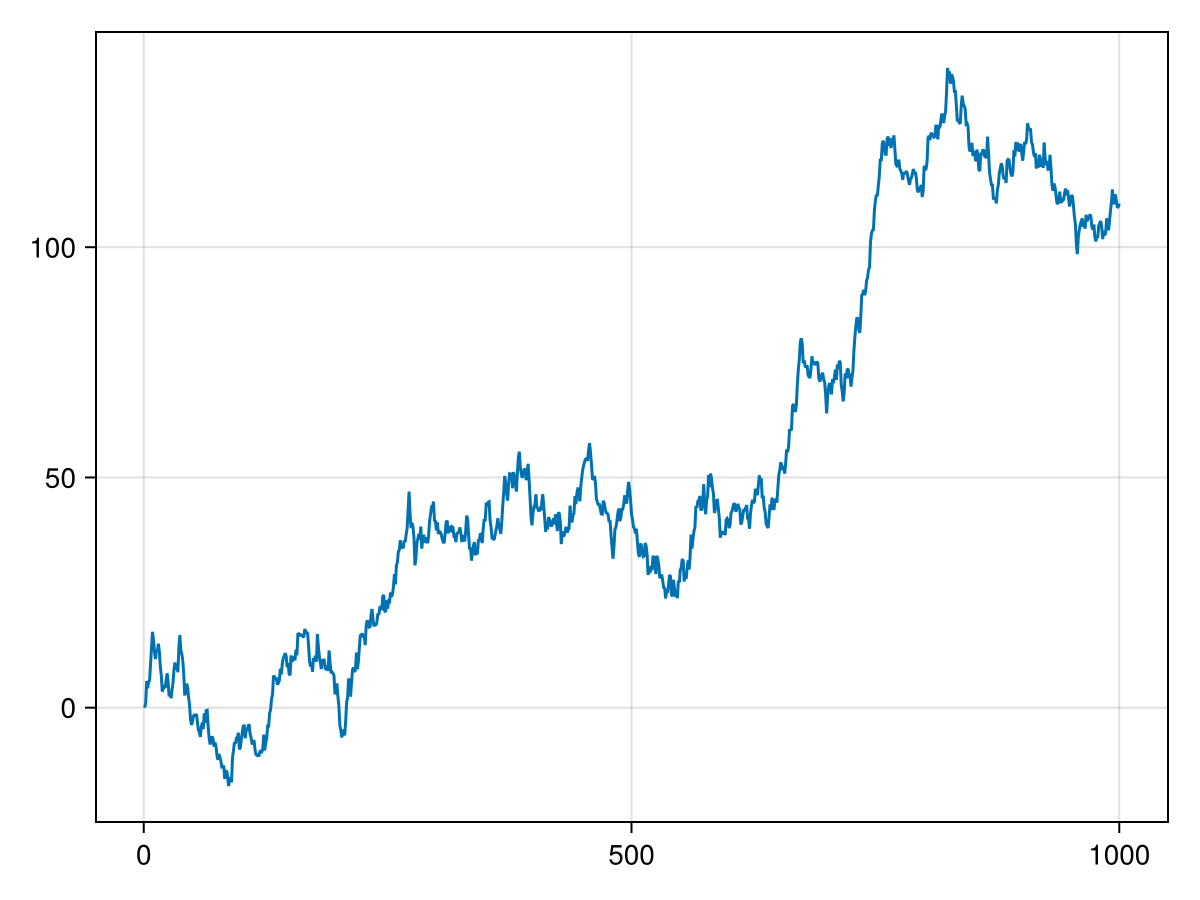

In [39]:
N = 1000
steps = rand(d, N-1)
x = pushfirst!(cumsum(steps),0)
lines(x)

In [18]:
function randwalk(d,N)
    steps = rand(d, N-1)
    x = pushfirst!(cumsum(steps),0)
    return x
end

randwalk (generic function with 1 method)

In [35]:
lots_of_rw = [randwalk(d,1000) for i in 1:500]

500-element Vector{Vector{Float64}}:
 [0.0, 3.6661337311220334, 1.1804725460159835, 0.22795528408695986, 3.805862242044803, 1.0075564837799962, -0.9846027316693489, 1.0687467522710206, 0.23243551097493054, -4.474674751329954  …  -50.28399158419715, -54.58708758336836, -51.84514221016793, -50.53474484124429, -45.62595556954247, -46.4152917765221, -48.78451592671588, -45.95163601484367, -45.71244880002229, -46.23003335290956]
 [0.0, 3.8929074691533616, 5.540334711115188, 7.62774989777513, 5.8973189474930034, 8.412384173039591, 8.013247310385628, 4.568242208279564, 7.240235646184153, 7.720611560639604  …  34.47134368532474, 33.79302292803838, 35.940046059274394, 35.902570179556676, 40.46282235778283, 35.21858716697906, 36.82656842040993, 37.76399766388841, 41.57418287860157, 43.168868438795435]
 [0.0, -1.7924012728006633, -0.6021851836071648, -0.39319896935915777, 0.46994322839206193, -0.37498264900612677, -0.7823773089820683, -3.220770383827377, -0.7234846923140346, 0.9583405273882146  …

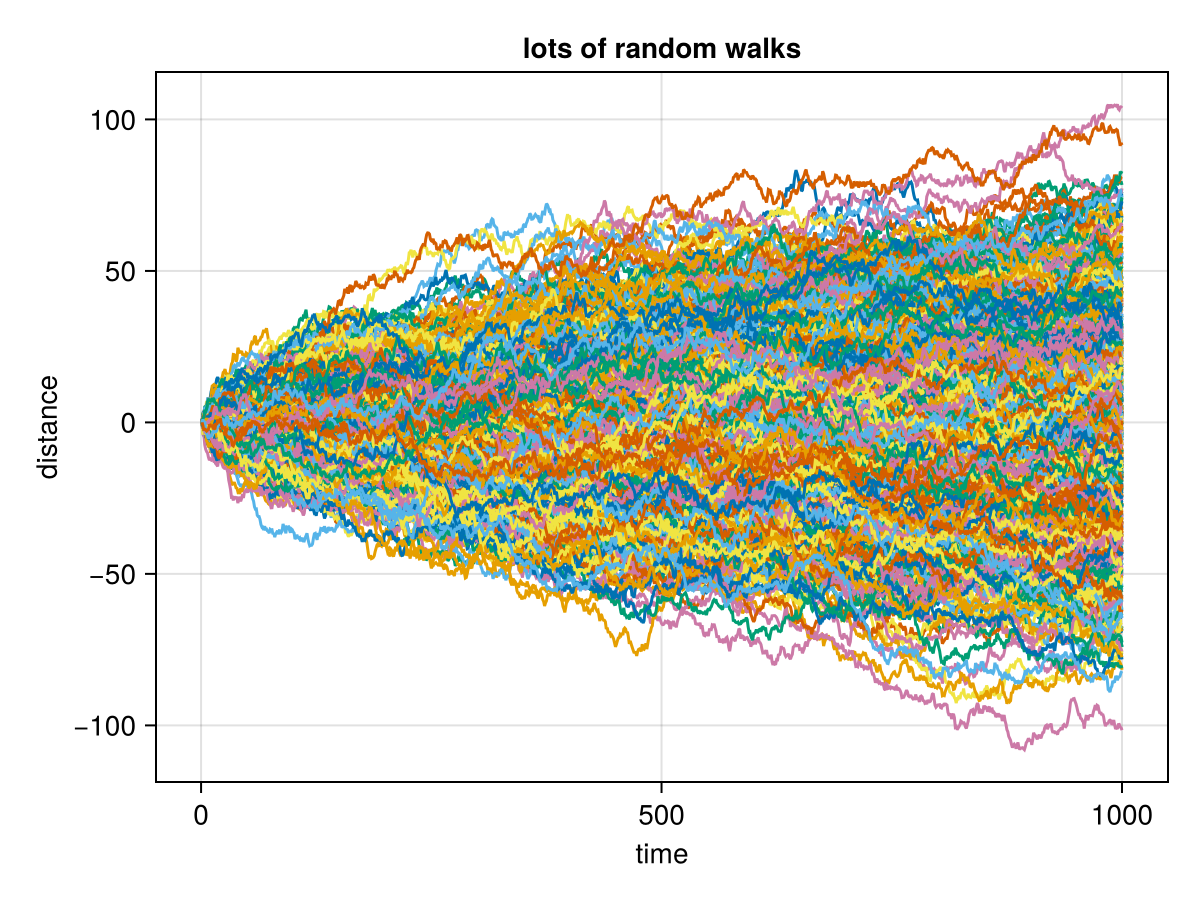

In [20]:
f = Figure()
ax = Axis(f[1,1],title="lots of random walks",xlabel="time",ylabel="distance")
for rw in lots_of_rw
    lines!(ax,rw)
end
f

In [36]:
lorw_mat = reduce(hcat,lots_of_rw)

1000×500 Matrix{Float64}:
   0.0        0.0          0.0       …   0.0           0.0         0.0
   3.66613    3.89291     -1.7924       -0.000716059   2.05477    -0.145285
   1.18047    5.54033     -0.602185     -1.12106       3.4701     -2.33216
   0.227955   7.62775     -0.393199      1.02767       3.80322    -4.27107
   3.80586    5.89732      0.469943      0.728484      0.482201   -4.29585
   1.00756    8.41238     -0.374983  …   2.23866       1.73121    -3.4696
  -0.984603   8.01325     -0.782377      1.77462       3.54635    -1.58857
   1.06875    4.56824     -3.22077       3.39923       3.92297    -4.08745
   0.232436   7.24024     -0.723485      4.31625       4.16516    -3.24519
  -4.47467    7.72061      0.958341      2.17276       4.04928    -6.05112
  -4.22011    5.59456      3.40358   …   0.253158      1.58157    -3.29745
  -4.3928     2.09158      4.41261      -1.01194       1.87734     0.344441
  -1.84315   -0.0327831    6.02357      -0.999706      1.01573     0.37968
  

In [28]:
mean(lorw_mat,dims=2)

1000×1 Matrix{Float64}:
  0.0
  0.008758681653467371
  0.009608104370160239
 -0.05145922603709968
 -0.026738602528861934
 -0.05249862864335338
 -0.09548945029073086
 -0.11406570229548017
 -0.1481922952245432
 -0.14123600047456628
 -0.1356311799911649
 -0.12301811764206336
 -0.18272429397478507
  ⋮
 -0.13923041295420666
 -0.08582828508123043
 -0.06981284896084261
 -0.0585173157152307
 -0.07180838397173647
 -0.045198499769697476
 -0.06852141614274242
 -0.08612300900714984
 -0.08160532796860744
 -0.09207555586410163
 -0.07958738439942728
 -0.09945239377681465

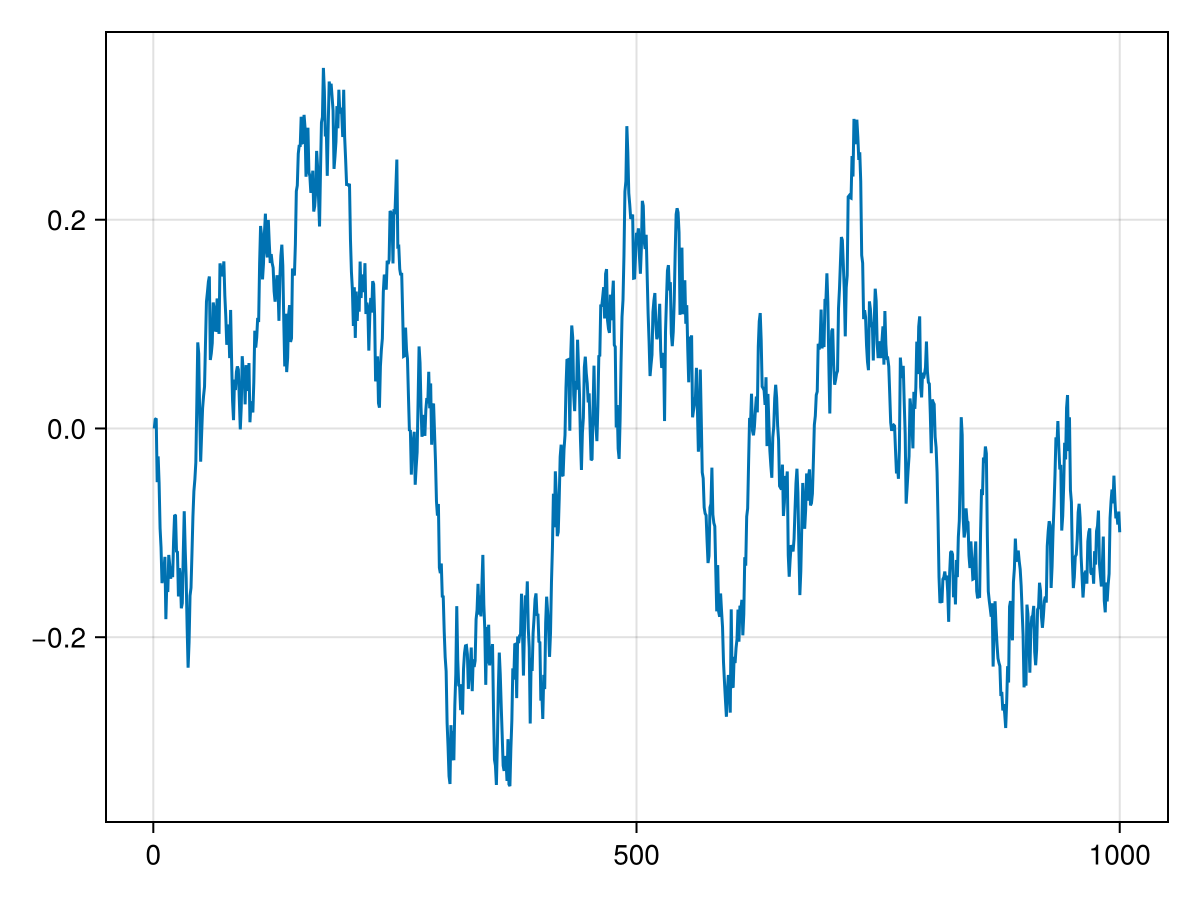

In [29]:
lines(mean(lorw_mat,dims=2)[:,1])

In [37]:
lorw_mat_sq = lorw_mat .^2

1000×500 Matrix{Float64}:
    0.0           0.0            0.0       …    0.0          0.0
   13.4405       15.1547         3.2127         4.22209      0.0211079
    1.39352      30.6953         0.362627      12.0416       5.43897
    0.0519636    58.1826         0.154605      14.4645      18.242
   14.4846       34.7784         0.220847       0.232518    18.4543
    1.01517      70.7682         0.140612  …    2.99709     12.0381
    0.969443     64.2121         0.612114      12.5766       2.52356
    1.14222      20.8688        10.3734        15.3897      16.7072
    0.0540263    52.421          0.52343       17.3486      10.5313
   20.0227       59.6078         0.918417      16.3967      36.616
   17.8094       31.2991        11.5844    …    2.50137     10.8732
   19.2967        4.37469       19.4712         3.52442      0.118639
    3.39719       0.00107473    36.2834         1.03172      0.144157
    ⋮                                      ⋱              
 2433.78       1284.4      

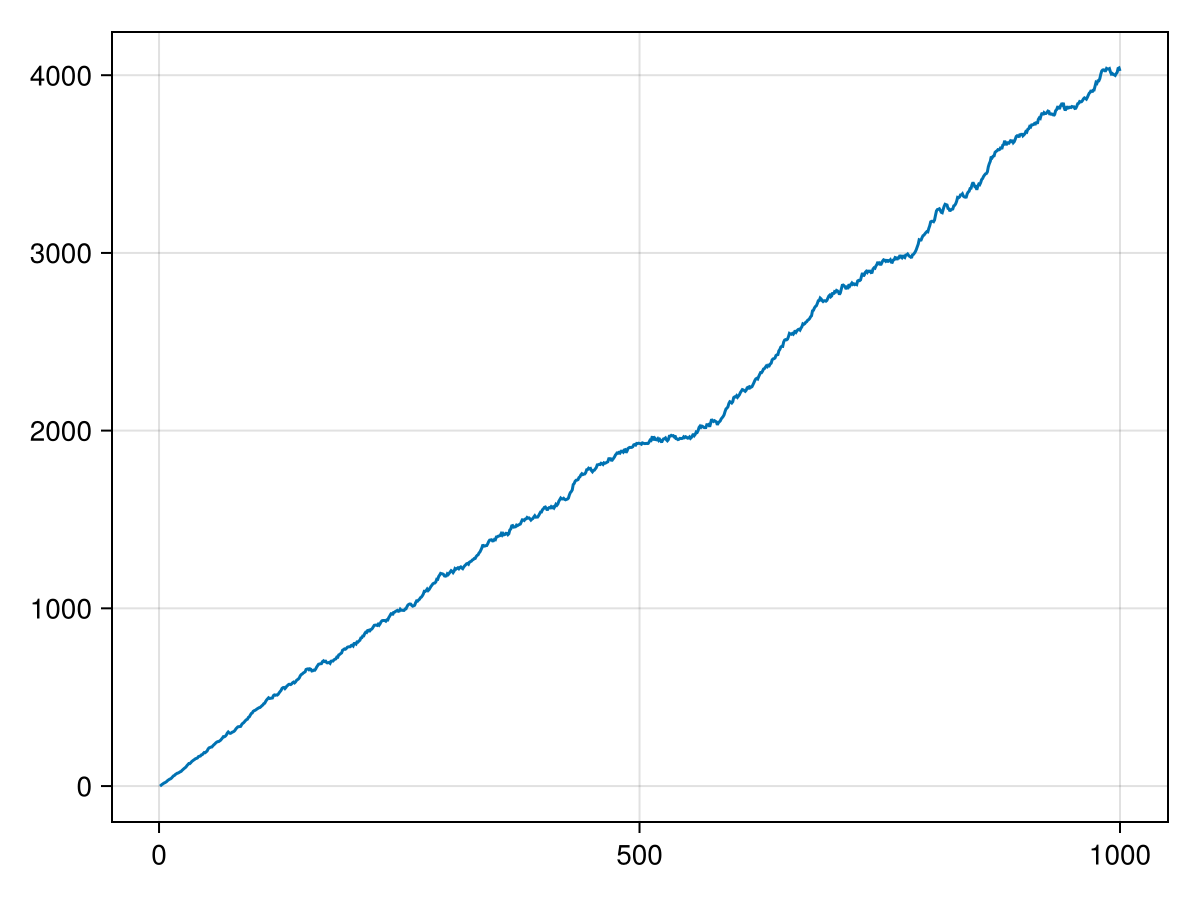

In [38]:
lines(mean(lorw_mat_sq,dims=2)[:,1])

In [52]:
function ou(d,N)
    x = [0.0]
    for i in 2:N
        push!(x,0.8*x[end]+rand(d))
    end
    return x
end

ou (generic function with 1 method)

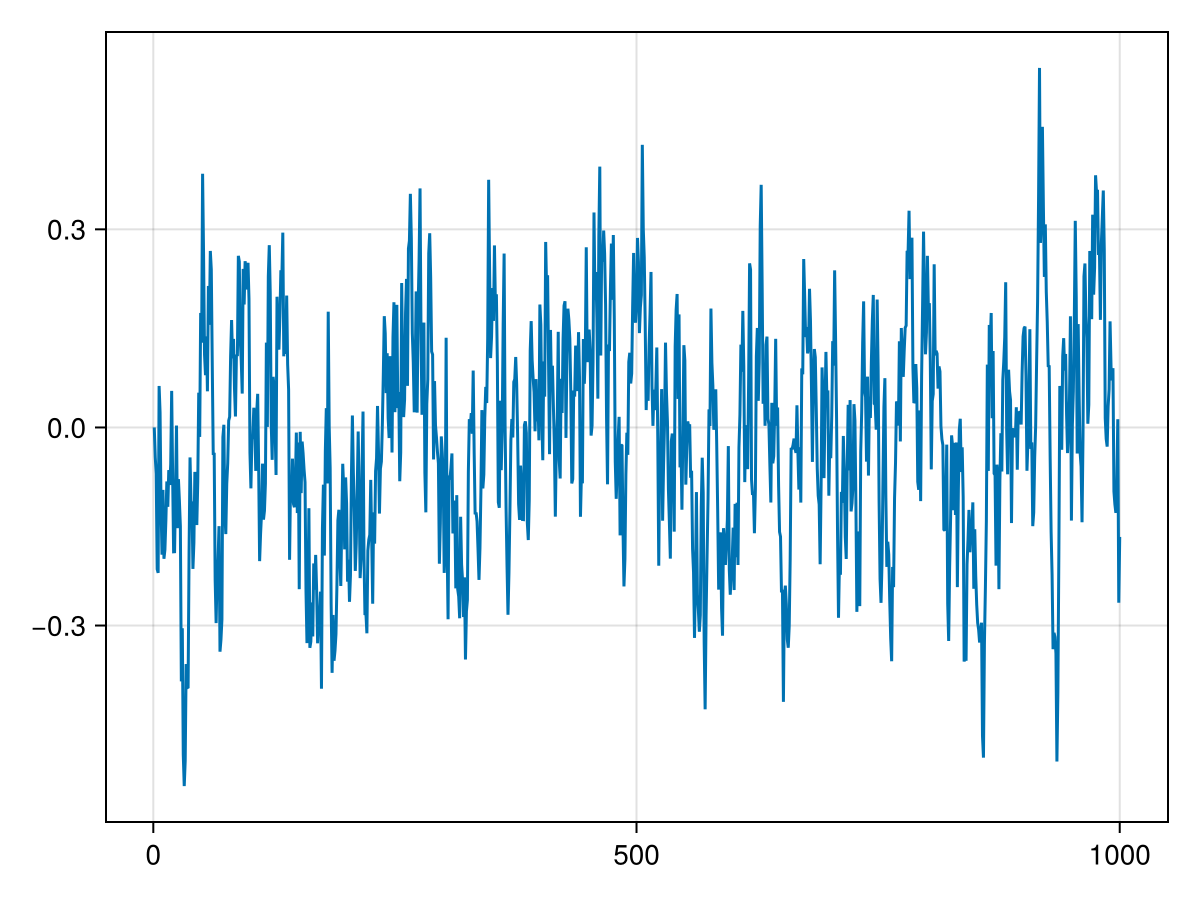

In [53]:
oux = ou(Normal(0,.1),1000)
lines(oux)